<a href="https://colab.research.google.com/github/ThiagoVisentimLopes/DataScience/blob/master/UtilizacaoPeneira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#pip install Office365-REST-Python-Client

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [5]:
# Leitura do arquivo Excel]
#df = pd.read_excel('Peneira.xlsx', sheet_name='Peneira',header=1)
df = pd.read_excel('Peneira.xlsx', sheet_name='Peneira',header=1)
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[1], axis=1)


In [6]:
# Selecionar as linhas 1, 2 e 3 e somar os valores
total_linhas = df.iloc[[1, 2, 3], :].sum()

# Adicionar uma nova linha com o total das linhas selecionadas
df.loc['Total'] = total_linhas

In [7]:
df = df.set_index('DIA').T
df.rename(columns={"PRODUÇÃO TERRAPRODUÇÃO FLUFFPRODUÇÃO RECT": "Total"}, inplace=True)

In [8]:
df['diasNumerados'] = range(1, len(df)+1)

In [9]:
df['Total Acumulado'] = df['Total'].cumsum()

In [10]:
df0 = df.iloc[:13, :].copy()

df13 = df.iloc[13:, :].copy()

In [11]:
df13['Total Acumulado Novo'] = df13['Total'].cumsum()

In [12]:
#Gerando dados de teste
TesteDf13 = pd.DataFrame({'diasNumerados': range(0, 14)})
TesteDf0 = pd.DataFrame({'diasNumerados': range(14, 31)})
TesteDf13Inicio = pd.DataFrame({'diasNumerados': range(18, 31)})

In [13]:
dias = pd.DataFrame({'Dia': range(1, 31)})

In [14]:
df13['diasNumeradosInicio'] = range(1, 18)

In [15]:
regDf0 = LinearRegression().fit(np.array(df0['diasNumerados']).reshape(-1, 1), df0['Total Acumulado'])
LinearPredictDf0 = regDf0.predict(TesteDf0)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [16]:
regDf13 = LinearRegression().fit(np.array(df13['diasNumerados']).reshape(-1, 1), df13['Total Acumulado'])
LinearPredictDf13 = regDf13.predict(TesteDf13)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [17]:
dataTeste = pd.DataFrame({'novaDATA': range(18, 31)})

In [ ]:
# Importar pacotes necessários
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Separar dados em treino e teste
X_train = np.array(df13.head(13)['diasNumeradosInicio']).reshape(-1, 1)
y_train = df13.head(13)['Total Acumulado Novo']

# Definir modelo SVM
model = SVR(kernel='rbf')

# Treinar modelo
model.fit(X_train, y_train)

# Fazer previsão
y_pred = model.predict(TesteDf13Inicio)

# Avaliar desempenho do modelo
#mse = mean_squared_error(df13['Total Acumulado Novo'], y_pred)
#print("Erro quadrático médio do modelo: {:.2f}".format(mse))

In [ ]:
regDf13Inicio = LinearRegression().fit(np.array(df13.head(13)['diasNumeradosInicio']).reshape(-1, 1), df13.head(13)['Total Acumulado Novo'])
LinearPredictDf13Inicio = regDf13Inicio.predict(TesteDf13Inicio)

In [20]:
LinearPredictDf13_pos = np.clip(LinearPredictDf13, a_min=0, a_max=None)

In [ ]:
df13['diasNumeradosInicio']

In [ ]:
np.array(df13['diasNumeradosInicio']).reshape(-1, 1)

# DF13

In [46]:
#Equação primeiro grau

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Separar dados em treino e teste
X_train = np.array(df13['diasNumeradosInicio']).reshape(-1, 1)
y_train = df13['Total Acumulado Novo']

# Normalizar dados
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

# Definir modelo SVM
#model = SVR(kernel='poly',gamma="auto", degree=2, C=40, epsilon=0.1, coef0=30)
##model = SVR(kernel='poly',gamma="auto", degree=2, C=25, epsilon=0.5, coef0=1) Melhor até agora
model = SVR(kernel='poly',gamma="auto", degree=2, C=50, epsilon=0.5, coef0=1)

# Treinar modelo
model.fit(X_train_norm, y_train)

# Normalizar dados de teste
X_test_norm = scaler.transform(TesteDf13Inicio)

# Fazer previsão
y_pred = model.predict(X_test_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [24]:
#POLINOMIAL

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Separar dados em treino e teste
X_train = np.array(df13['diasNumeradosInicio']).reshape(-1, 1)
y_train = df13['Total Acumulado Novo']

# Normalizar dados
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

# Definir modelo SVM
#model = SVR(kernel='poly',gamma="auto", degree=2, C=20, epsilon=0.3, coef0=3)
#model = SVR(kernel='poly',gamma="auto", degree=2, C=25, epsilon=0.5, coef0=1)
#model = SVR(kernel='poly',gamma="auto", degree=3, C=1, epsilon=3, coef0=1)
# Treinar modelo
model.fit(X_train_norm, y_train)

# Normalizar dados de teste
X_test_norm = scaler.transform(TesteDf13Inicio)

# Fazer previsão
y_predPoli = model.predict(X_test_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [25]:
len(np.array(df13['diasNumeradosInicio']).reshape(-1, 1))

17

In [26]:
# Calcular RMSE
y_true = df.tail(13)['Total Acumulado'] # valores reais da variável de destino no conjunto de teste
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE:', rmse)

RMSE: 2390.946268406979


# DF0 Ignorar por enquanto (ficou abaixo do acumulado, estranho)

In [27]:
#APENAS TESTE DF0

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Separar dados em treino e teste
X_train = np.array(df0['diasNumerados']).reshape(-1, 1)
y_train = df0['Total Acumulado']

# Normalizar dados
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

# Definir modelo SVM
model = SVR(kernel='poly', degree=3, C=10, epsilon=0.1, coef0=50)

# Treinar modelo
model.fit(X_train_norm, y_train)

# Normalizar dados de teste
X_test_norm = scaler.transform(TesteDf0)

# Fazer previsão
y_pred2 = model.predict(X_test_norm)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [28]:
y_pred

array([2540.94922737, 2778.30246465, 3028.2727097 , 3290.85996251,
       3566.06422308, 3853.88549142, 4154.32376752, 4467.37905138,
       4793.05134301, 5131.3406424 , 5482.24694956, 5845.77026447,
       6221.91058716])

In [29]:
y_pred

array([2540.94922737, 2778.30246465, 3028.2727097 , 3290.85996251,
       3566.06422308, 3853.88549142, 4154.32376752, 4467.37905138,
       4793.05134301, 5131.3406424 , 5482.24694956, 5845.77026447,
       6221.91058716])

In [30]:
X_train

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13]])

In [31]:
TesteDf13Inicio

,diasNumerados
0,18
1,19
2,20
3,21
4,22
5,23
6,24
7,25
8,26
9,27


In [32]:
df13['diasNumeradosInicio']

14     1
15     2
16     3
17     4
18     5
19     6
20     7
21     8
22     9
23    10
24    11
25    12
26    13
27    14
28    15
29    16
30    17
Name: diasNumeradosInicio, dtype: int64

# Plotando grafico

In [33]:
y_pred

array([2540.94922737, 2778.30246465, 3028.2727097 , 3290.85996251,
       3566.06422308, 3853.88549142, 4154.32376752, 4467.37905138,
       4793.05134301, 5131.3406424 , 5482.24694956, 5845.77026447,
       6221.91058716])

In [34]:
TesteDf13Inicio

,diasNumerados
0,18
1,19
2,20
3,21
4,22
5,23
6,24
7,25
8,26
9,27


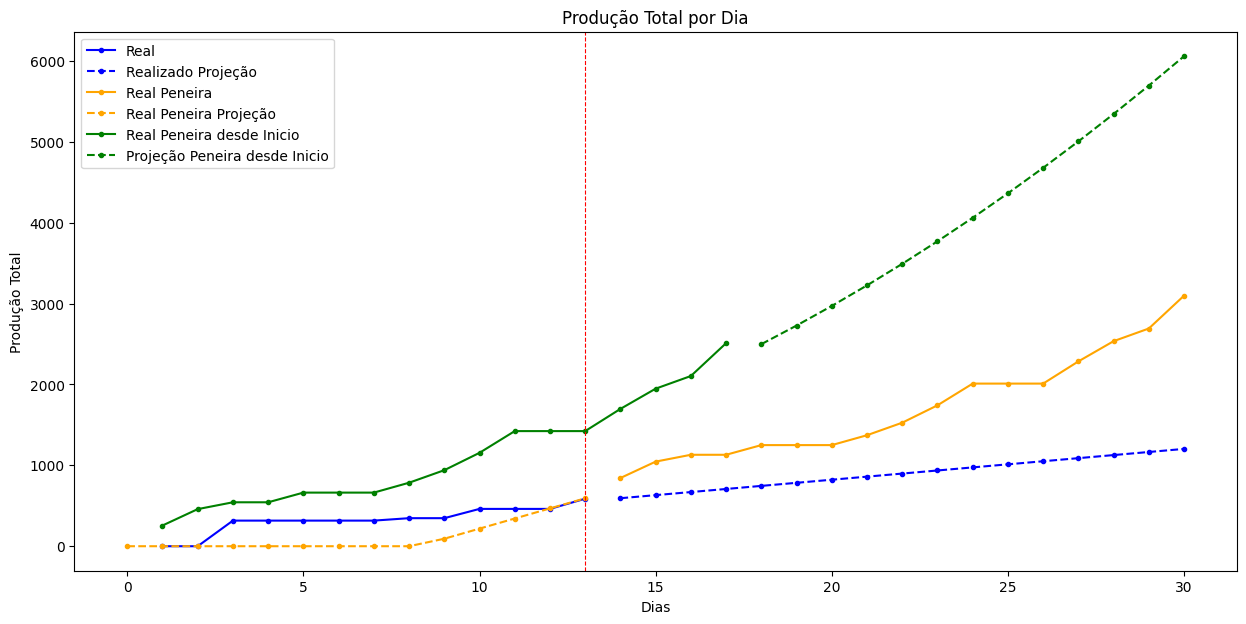

In [47]:
# plotar gráfico de linha
plt.figure(figsize=(15,7))
#conjunto1
plt.plot(df0['diasNumerados'], df0['Total Acumulado'],color='blue',label='Real',marker='.')
plt.plot(TesteDf0['diasNumerados'], LinearPredictDf0,color='blue', linestyle='--',label='Realizado Projeção',marker='.')
#plt.plot(TesteDf0['diasNumerados'], y_pred2,color='red', linestyle='--',label='Realizado Projeção',marker='.')
#conjunto2
plt.plot(df13['diasNumerados'], df13['Total Acumulado'],color='orange',label='Real Peneira',marker='.')
plt.plot(TesteDf13['diasNumerados'], LinearPredictDf13_pos,color='orange', linestyle='--',label='Real Peneira Projeção',marker='.')

#conjunto3
plt.plot(df13['diasNumeradosInicio'], df13['Total Acumulado Novo'],color='green', linestyle='-',label='Real Peneira desde Inicio',marker='.')
plt.plot(TesteDf13Inicio['diasNumerados'].to_numpy(), y_pred,color='green', linestyle='--',label='Projeção Peneira desde Inicio',marker='.')
#plt.plot(TesteDf13Inicio['diasNumerados'].to_numpy(), y_predPoli,color='black', linestyle='--',label='Projeção Peneira desde Inicio',marker='.')

plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
# adicionar título ao gráfico
plt.title('Produção Total por Dia')

# adicionar rótulos nos eixos x e y
plt.xlabel('Dias')
plt.ylabel('Produção Total')

# adicionar legenda

#linhas horizontas
#for y in range(0,5000,500):
 #   plt.axhline(y=y, color='gray', linestyle='--')

plt.legend()
# exibir o gráfico

plt.show()

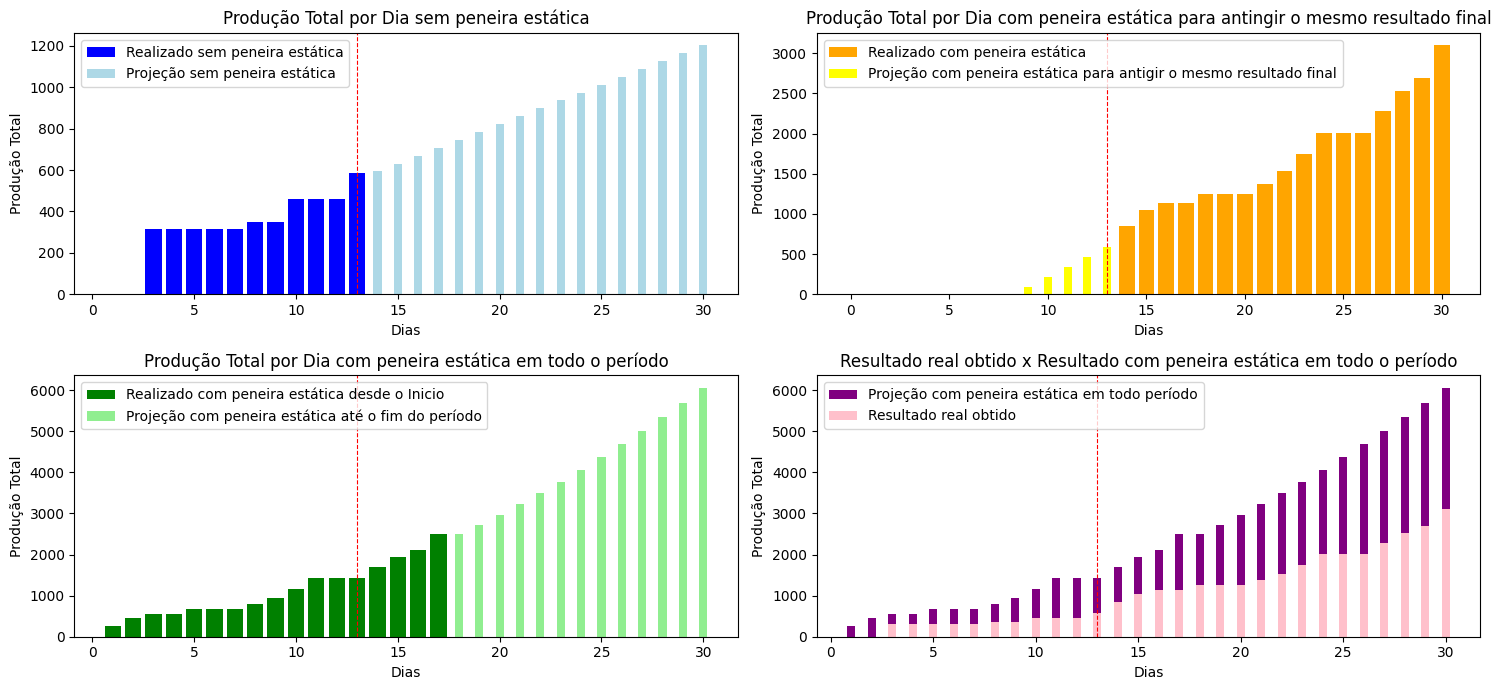

In [48]:
# plotar gráfico de barras
plt.figure(figsize=(15,7))

bar_width = 0.4

# primeiro conjunto de dados
plt.subplot(2,2,1)
plt.bar(df0['diasNumerados'], df0['Total Acumulado'], color='blue', label='Realizado sem peneira estática')
plt.bar(TesteDf0['diasNumerados'], LinearPredictDf0, color='lightblue', label='Projeção sem peneira estática', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Produção Total por Dia sem peneira estática')
plt.xlabel('Dias')
plt.ylabel('Produção Total')
plt.legend()

# segundo conjunto de dados
plt.subplot(2,2,2)
plt.bar(df13['diasNumerados'], df13['Total Acumulado'], color='orange', label='Realizado com peneira estática')
plt.bar(TesteDf13['diasNumerados'], LinearPredictDf13_pos, color='yellow', label='Projeção com peneira estática para antigir o mesmo resultado final', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Produção Total por Dia com peneira estática para antingir o mesmo resultado final')
plt.xlabel('Dias')
plt.ylabel('Produção Total')
plt.legend()

# terceiro conjunto de dados
plt.subplot(2,2,3)
plt.bar(df13['diasNumeradosInicio'], df13['Total Acumulado Novo'], color='green', label='Realizado com peneira estática desde o Inicio')
plt.bar(TesteDf13Inicio['diasNumerados'].to_numpy(), y_pred, color='lightgreen', label='Projeção com peneira estática até o fim do período', width=bar_width)
#plt.bar(TesteDf13Inicio['diasNumerados'].to_numpy(), y_predPoli, color='red', label='Projeção com peneira estática até o fim do período', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Produção Total por Dia com peneira estática em todo o período')
plt.xlabel('Dias')
plt.ylabel('Produção Total')
plt.legend()

# quarto conjunto de dados
plt.subplot(2,2,4)

plt.bar(df13['diasNumeradosInicio'], df13['Total Acumulado Novo'], color='purple', width=bar_width)
plt.bar(TesteDf13Inicio['diasNumerados'].to_numpy(), y_pred, color='purple', label='Projeção com peneira estática em todo período', width=bar_width)
plt.bar(df['diasNumerados'], df['Total Acumulado'], color='pink', label='Resultado real obtido', width=bar_width)
plt.axvline(x=13, color='red', linestyle='--', linewidth=0.8)
plt.title('Resultado real obtido x Resultado com peneira estática em todo o período')
plt.xlabel('Dias')
plt.ylabel('Produção Total')
plt.legend()

plt.tight_layout()

# exibir o gráfico
plt.show()